In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns      

In [22]:
cd = pd.read_csv("Mall_Customers.csv") #reading the csv file from the notebook

In [23]:
cd.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
cd.shape #knowing the data sizes(table)

(200, 5)

In [25]:
cd.describe()  #overview of the data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [26]:
cd.dtypes  #datatypes in the current data set

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [27]:
cd.isnull().sum()  #finding the NaN values in tge coloums

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [28]:
cd.drop(["CustomerID"],axis=1,inplace = True)  #deleting the unwanted data in the data set

In [29]:
cd.head()  #printing the top 5 values in the data set

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\Users\ajayj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ajayj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ajayj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

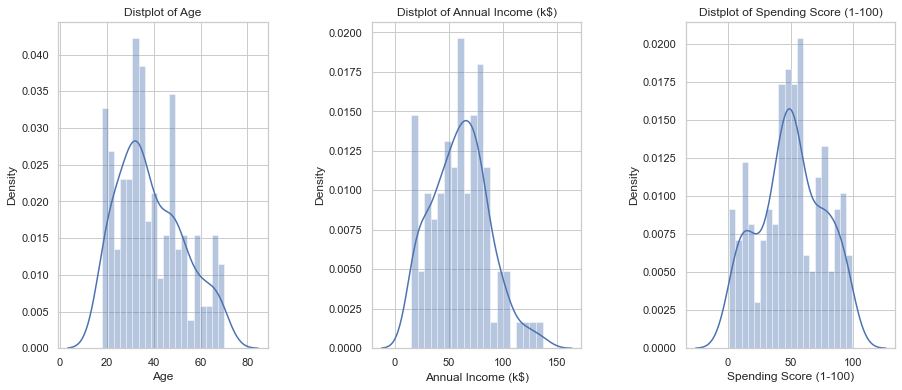

In [30]:
plt.figure(1,figsize=(15,6))       #plotting the data in graphical represntation 
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:  #age , annual income and spending scores graph
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
    sns.distplot(cd[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()   

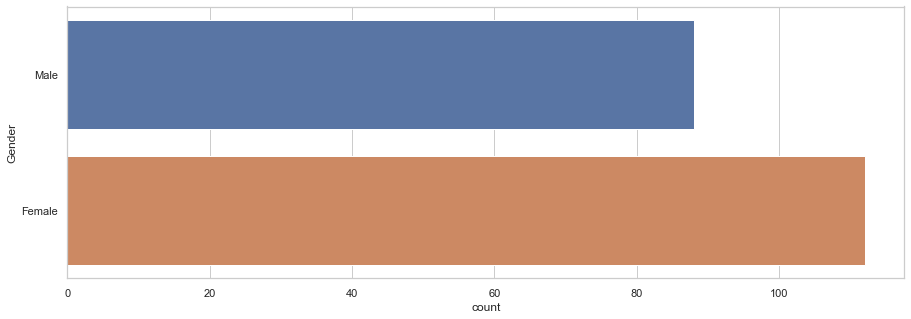

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data = cd)  #coustomer graph based on gender
plt.show()

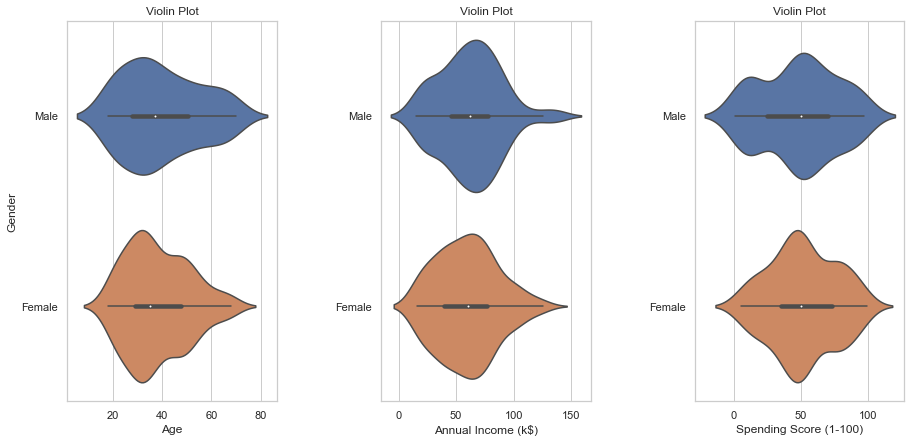

In [32]:
plt.figure(1,figsize=(15,7))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    sns.set(style = "whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Gender', data = cd)   
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violin Plot')
plt.show()

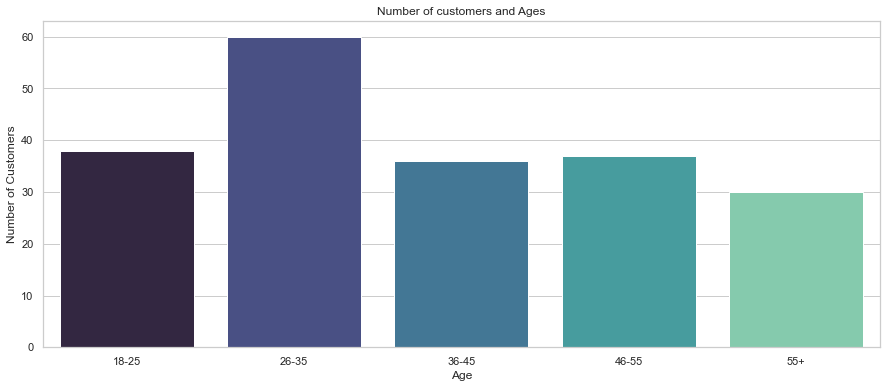

In [33]:
age_18_25 = cd.Age[(cd.Age >= 18) & (cd.Age <= 25)]
age_26_35 = cd.Age[(cd.Age >= 26) & (cd.Age <= 35)]
age_36_45 = cd.Age[(cd.Age >= 36) & (cd.Age <= 45)]
age_46_55 = cd.Age[(cd.Age >= 46) & (cd.Age <= 55)]
age_55above = cd.Age[(cd.Age >= 55)]

agex = ['18-25','26-35','36-45','46-55','55+']   #x-axis values
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)] #y-axis values

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette = "mako")     #bar graph representation 
plt.title("Number of customers and Ages")
plt.xlabel('Age')
plt.ylabel("Number of Customers")
plt.show()

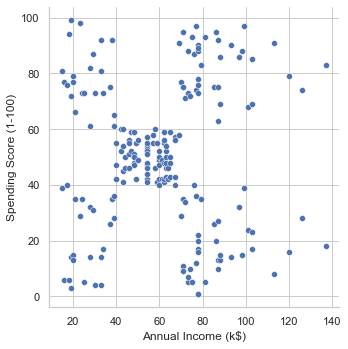

In [34]:
sns.relplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = cd)  #cluster represntation

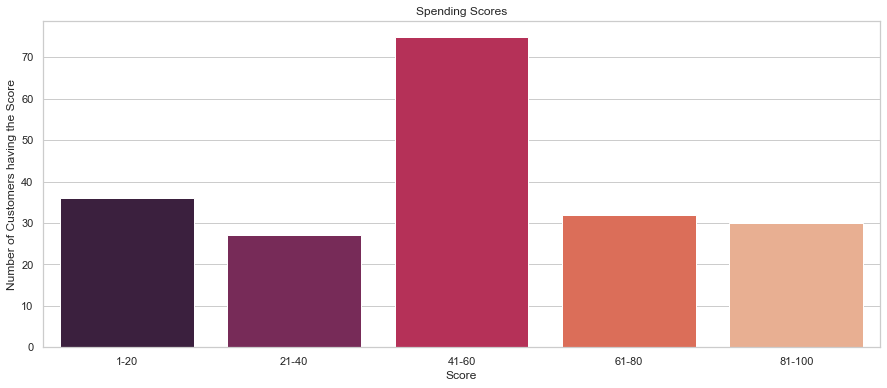

In [36]:
ss_1_20 = cd['Spending Score (1-100)'][(cd['Spending Score (1-100)'] >= 1) & (cd['Spending Score (1-100)'] <= 20)]
ss_21_40 = cd['Spending Score (1-100)'][(cd['Spending Score (1-100)'] >= 21) & (cd['Spending Score (1-100)'] <= 40)]
ss_41_60 = cd['Spending Score (1-100)'][(cd['Spending Score (1-100)'] >= 41) & (cd['Spending Score (1-100)'] <= 60)]
ss_61_80 = cd['Spending Score (1-100)'][(cd['Spending Score (1-100)'] >= 61) & (cd['Spending Score (1-100)'] <= 80)]
ss_81_100 = cd['Spending Score (1-100)'][(cd['Spending Score (1-100)'] >= 81) & (cd['Spending Score (1-100)'] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette = "rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customers having the Score")
plt.show()

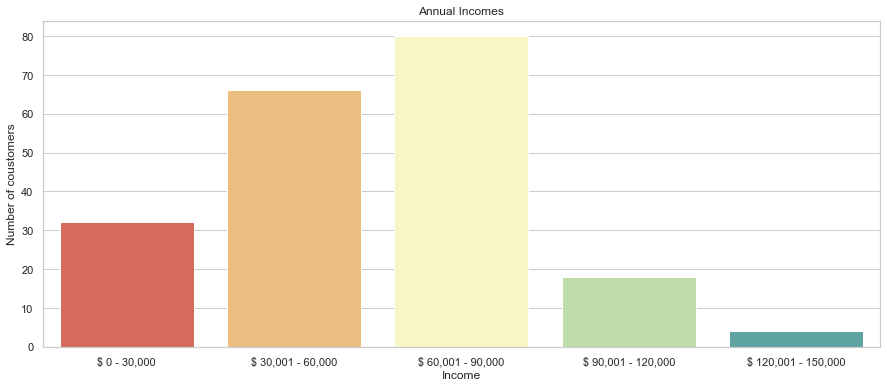

In [38]:
ai0_30 = cd["Annual Income (k$)"][(cd['Annual Income (k$)'] >= 0) & (cd['Annual Income (k$)'] <= 30)]
ai31_60 = cd["Annual Income (k$)"][(cd['Annual Income (k$)'] >= 31) & (cd['Annual Income (k$)'] <= 60)]
ai61_90 = cd["Annual Income (k$)"][(cd['Annual Income (k$)'] >= 61) & (cd['Annual Income (k$)'] <= 90)]
ai91_120 = cd["Annual Income (k$)"][(cd['Annual Income (k$)'] >= 91) & (cd['Annual Income (k$)'] <= 120)]
ai121_150 = cd["Annual Income (k$)"][(cd['Annual Income (k$)'] >= 121) & (cd['Annual Income (k$)'] <= 150)]

aix = ['$ 0 - 30,000', '$ 30,001 - 60,000', '$ 60,001 - 90,000', '$ 90,001 - 120,000', '$ 120,001 - 150,000']
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = aix, y = aiy, palette = "Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of coustomers")
plt.show()

In [77]:
x1

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

C:\Users\ajayj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


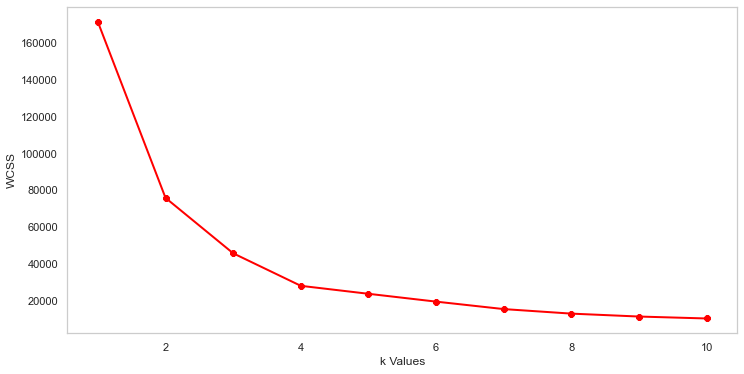

In [51]:
x1 = cd.loc[:, ["Age","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans  
wcss = []     
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth = 2, color = "red", marker = "8")
plt.xlabel("k Values")
plt.ylabel("WCSS")
plt.show()

In [78]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(x1)

print(label)
x1

[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [54]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


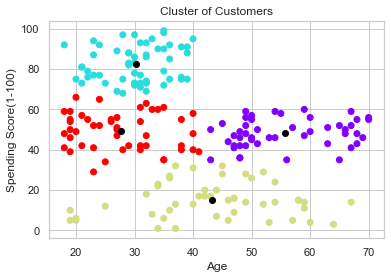

In [55]:
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black')
plt.title("Cluster of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score(1-100)")
plt.show()

C:\Users\ajayj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


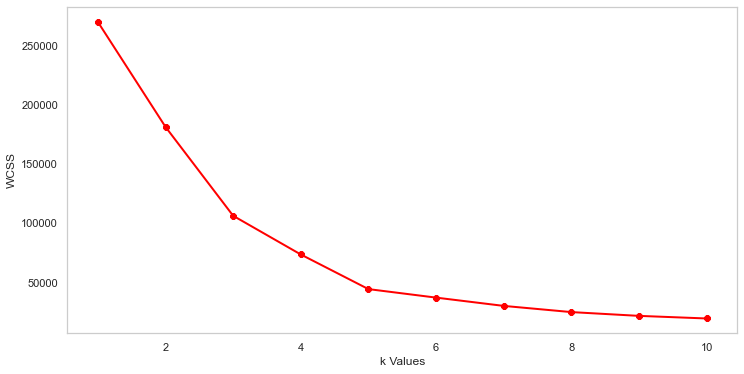

In [56]:
x2 = cd.loc[:, ["Annual Income (k$)","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans  
wcss = []     
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth = 2, color = "red", marker = "8")
plt.xlabel("k Values")
plt.ylabel("WCSS")
plt.show()

In [57]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(x2)

print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 3 4 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 3 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [58]:
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]]


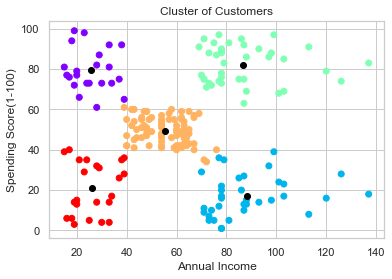

In [60]:
plt.scatter(x2[:,0], x2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black')
plt.title("Cluster of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score(1-100)")
plt.show()

C:\Users\ajayj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


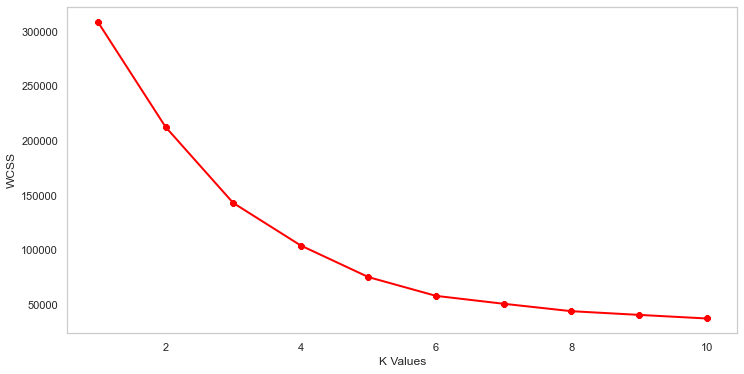

In [67]:
x3 = cd.iloc[:,1:]

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color = "red", marker = '8')
plt.xlabel("K Values")
plt.ylabel("WCSS")
plt.show()

In [68]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(x3)
print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [69]:
print(kmeans.cluster_centers_)

[[25.52173913 26.30434783 78.56521739]
 [40.66666667 87.75       17.58333333]
 [43.08860759 55.29113924 49.56962025]
 [32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]]


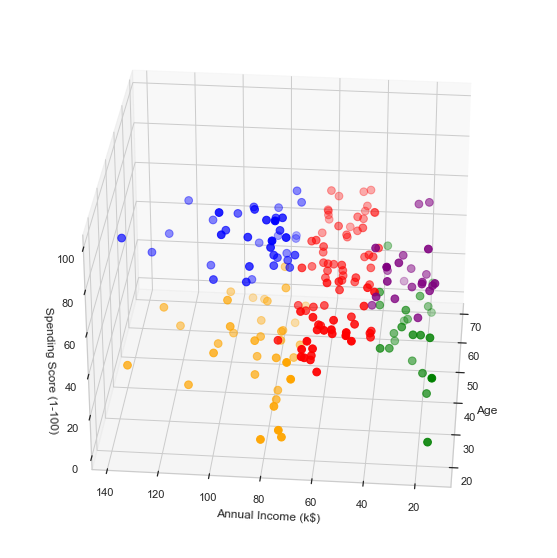

In [73]:
clusters = kmeans.fit_predict(x3)
cd["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(cd.Age[cd.label == 0], cd["Annual Income (k$)"][cd.label == 0], cd["Spending Score (1-100)"][cd.label == 0],c='blue', s=60)
ax.scatter(cd.Age[cd.label == 1], cd["Annual Income (k$)"][cd.label == 1], cd["Spending Score (1-100)"][cd.label == 1],c='red', s=60)
ax.scatter(cd.Age[cd.label == 2], cd["Annual Income (k$)"][cd.label == 2], cd["Spending Score (1-100)"][cd.label == 2],c='green', s=60)
ax.scatter(cd.Age[cd.label == 3], cd["Annual Income (k$)"][cd.label == 3], cd["Spending Score (1-100)"][cd.label == 3],c='orange', s=60)
ax.scatter(cd.Age[cd.label == 4], cd["Annual Income (k$)"][cd.label == 4], cd["Spending Score (1-100)"][cd.label == 4],c='purple', s=60)
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.show()

In [74]:
import pickle
pkl_filename = r"C:\Users\ajayj\Downloads\kmeans_scalar_model.pkl"
with open(pkl_filename,'wb') as file:
    pickle.dump(clusters,file)

In [76]:
x3.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
